<a href="https://colab.research.google.com/github/Suchithrareddyn/Electricity-Bills/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Environment setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# **Data loading**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Electricity bills 1.csv")
df.head()

,Unnamed: 0,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,account_months,customer_months,premise_type_code,median_hh_income,median_age,avg_hh_size,gini_index,avg_hours_worked,median_monthly_housing_costs,perc_industry_agriculture_forestry,perc_industry_construction,perc_industry_manufacturing,perc_industry_wholesale_trade,perc_industry_retail_trade,perc_industry_transportation_utilities,perc_industry_information,perc_industry_finance_real_estate,perc_industry_prof_sci_mgmt_admin_waste,perc_industry_education_health_social,perc_industry_arts_ent_accom_food,perc_industry_other_services,perc_industry_public_admin,perc_hh_has_computing_devices,perc_hh_has_no_computing_devices,perc_educ_8th_grade,perc_educ_9th_grade,perc_educ_10th_grade,perc_educ_11th_grade,perc_educ_12th_grade_no_diploma,perc_educ_high_school_diploma,perc_educ_ged,perc_educ_1_yr_college_no_degree,perc_educ_multi_yr_college_no_degree,perc_educ_associates_degree,perc_educ_bachelors_degree,perc_educ_masters_degree,perc_educ_professional_degree,perc_educ_doctorate_degree,perc_pop_not_in_labor_force,perc_pop_in_civ_labor_force_unemp,perc_hh_type_family_married,perc_hh_type_single_parent,perc_hh_type_nonfamily_roommates,perc_hh_type_nonfamily_bach,perc_health_ins_private,perc_native,perc_foreign_natur,perc_foreign_noncit,perc_work_transp_car,perc_work_transp_public,perc_mortgage_has_mort_2nd_only,perc_mortgage_has_mort_heloc_only,perc_mortgage_has_mort_2nd_and_heloc,perc_mortgage_has_mort_no_2nd_no_heloc,perc_hh_workers_none,perc_hh_workers_1,perc_hh_workers_2,perc_hh_workers_3ormore,perc_poverty_lev_below,perc_hh_welfare_received,perc_hh_inc_to_pov_lev_0to0.5,perc_hh_inc_to_pov_lev_0.5to1,perc_hh_inc_to_pov_lev_1to1.25,perc_hh_inc_to_pov_lev_1.25to1.5,perc_hh_inc_to_pov_lev_1.5to1.85,perc_hh_inc_to_pov_lev_1.85to2,perc_hh_inc_to_pov_lev_2andover,late
0,0,0,0,97.23,-81.50,11-12-2018 16:03,19-12-2018 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU,72031,38.7,2.91,0.3443,37.2,1262,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.01002,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.01175,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.012781,0.710634,0
1,1,1,0,86.02,-97.23,10-01-2019 16:03,22-01-2019 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU,72031,38.7,2.91,0.3443,37.2,1262,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.01002,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.01175,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.012781,0.710634,0
2,2,2,0,82.94,-86.02,11-02-2019 16:04,20-02-2019 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU,72031,38.7,2.91,0.3443,37.2,1262,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.01002,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.01175,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.0

In [5]:
df.shape

(158363, 85)

There are total 85 columns
Taking only important columns required for analysis
drops = list(df.columns[19:])

In [7]:
df = df[['bill_id','account_id','billing_amount','current_balance','pay_cre_dt','due_dt','tender_type','tender_type_descr','has_email','bill_mailed','dwelling_type_desc','has_med_cert','is_equal_pay_acct',
      'own_rent','is_renewable','is_web_registered','account_months','customer_months','premise_type_code']]
df.head()

,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,account_months,customer_months,premise_type_code
0,0,0,97.23,-81.50,11-12-2018 16:03,19-12-2018 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU
1,1,0,86.02,-97.23,10-01-2019 16:03,22-01-2019 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU
2,2,0,82.94,-86.02,11-02-2019 16:04,20-02-2019 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU
3,3,0,91.38,-82.94,25-03-2019 16:04,21-03-2019 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU
4,4,0,68.32,-91.38,10-04-2019 16:04,19-04-2019 00:00,CHCK,Check,True,1,SingleFamily,False,False,O,False,True,34,258,HOU


In [8]:
df.shape

(158363, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158363 entries, 0 to 158362
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bill_id             158363 non-null  int64  
 1   account_id          158363 non-null  int64  
 2   billing_amount      158363 non-null  float64
 3   current_balance     158363 non-null  float64
 4   pay_cre_dt          158363 non-null  object 
 5   due_dt              158363 non-null  object 
 6   tender_type         76507 non-null   object 
 7   tender_type_descr   76507 non-null   object 
 8   has_email           158363 non-null  bool   
 9   bill_mailed         158363 non-null  int64  
 10  dwelling_type_desc  158329 non-null  object 
 11  has_med_cert        158363 non-null  bool   
 12  is_equal_pay_acct   158363 non-null  bool   
 13  own_rent            158363 non-null  object 
 14  is_renewable        158363 non-null  bool   
 15  is_web_registered   158363 non-nul

# **Descriptive statstics**

In [10]:
df.describe(include="all")

,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,account_months,customer_months,premise_type_code
count,158363.000000,158363.000000,158363.000000,158363.000000,158363,158363,76507,76507,158363,158363.000000,158329,158363,158363,158363,158363,158363,158363.000000,158363.000000,158363
unique,NaN,NaN,NaN,NaN,38035,391,7,7,2,NaN,4,2,2,2,2,2,NaN,NaN,8
top,NaN,NaN,NaN,NaN,01-02-2019 19:42,05-02-2020 00:00,CHCK,Check,True,NaN,SingleFamily,False,False,O,False,True,NaN,NaN,HOU
freq,NaN,NaN,NaN,NaN,238,933,70451,70451,120083,NaN,104557,157725,143995,82310,111837,115051,NaN,NaN,104557
mean,79181.000000,4961.583545,115.968180,-77.913308,NaN,NaN,NaN,NaN,NaN,0.525325,NaN,NaN,NaN,NaN,NaN,NaN,137.889457,210.082892,NaN
std,45715.604677,2868.275677,88.959604,229.985583,NaN,NaN,NaN,NaN,NaN,0.499360,NaN,NaN,NaN,NaN,NaN,NaN,131.509690,167.050376,NaN
min,0.000000,0.000000,-20.810000,-25027.850000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,NaN
25%,39590.500000,2479.000000,64.570000,-130.360000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,81.000000,NaN
50%,79181.000000,4947.000000,93.860000,-80.680000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,201.000000,NaN
75%,118771.500000,7443.500000,141.180000,-44.240000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,201.000000,268.000000,NaN


In [11]:
## Checking duplicate Values
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
158358    False
158359    False
158360    False
158361    False
158362    False
Length: 158363, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
## Checking Missing Values
print(df.isnull().sum()) 

bill_id                   0
account_id                0
billing_amount            0
current_balance           0
pay_cre_dt                0
due_dt                    0
tender_type           81856
tender_type_descr     81856
has_email                 0
bill_mailed               0
dwelling_type_desc       34
has_med_cert              0
is_equal_pay_acct         0
own_rent                  0
is_renewable              0
is_web_registered         0
account_months            0
customer_months           0
premise_type_code         0
dtype: int64


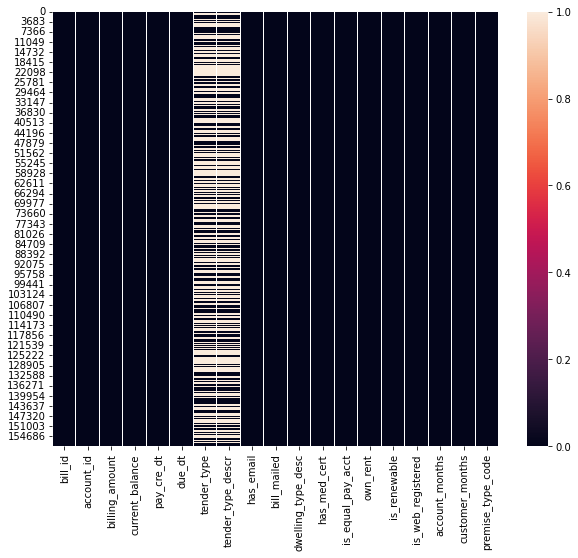

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna())

## **Handling Null values**

In [17]:
df["tender_type"].isnull().sum()

81856

In [15]:
mode= df.tender_type.mode()
mode
#The most common payment method is through Check

0    CHCK
dtype: object

In [16]:
df.groupby(['tender_type']).size()

tender_type
CACK        7
CASH     4281
CC        256
CHCK    70451
CMT      1365
DEBT       39
MO        108
dtype: int64

In [20]:
#let's fill the NULLs with "CHCK" value
df['tender_type_filled'] =df['tender_type'].fillna(value='CHCK')
df['tender_type_filled'].isnull().sum()

0

In [21]:
df.groupby(['tender_type_filled']).size()

tender_type_filled
CACK         7
CASH      4281
CC         256
CHCK    152307
CMT       1365
DEBT        39
MO         108
dtype: int64

In [22]:
df["tender_type_descr"].isnull().sum()

81856

In [23]:
df.groupby(['tender_type_descr']).size()
#The most common payment method is through Check

tender_type_descr
Cash                4281
Cashier's Check        7
Check              70451
Commitment          1365
Credit Card          256
Debit Card            39
Money Order          108
dtype: int64

In [24]:
# Filling the null values with the most common value "check "
df['tender_type_descr1'] =df['tender_type_descr'].fillna(value='check')
df['tender_type_descr1'].isnull().sum()

0

In [25]:
df["dwelling_type_desc"].isnull().sum()

34

In [26]:
df.groupby(['dwelling_type_desc']).size()

dwelling_type_desc
Manufactured      7652
MultiFamily      45931
Other              189
SingleFamily    104557
dtype: int64

In [27]:
# Filling the null values with the most common value "MultiFamily"
df['dwelling_type_filled'] =df['dwelling_type_desc'].fillna(value='MultiFamily')
df['dwelling_type_filled'].isnull().sum()

0

In [29]:
### Summary Statistics ###
df_summary = df[['billing_amount','current_balance','account_months','customer_months']]
df_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
billing_amount,158363.0,115.968180,88.959604,-20.81,64.57,93.86,141.18,2492.96
current_balance,158363.0,-77.913308,229.985583,-25027.85,-130.36,-80.68,-44.24,20522.85
account_months,158363.0,137.889457,131.509690,3.00,39.00,84.00,201.00,725.00
customer_months,158363.0,210.082892,167.050376,4.00,81.00,201.00,268.00,845.00


# **Univariate analysis**

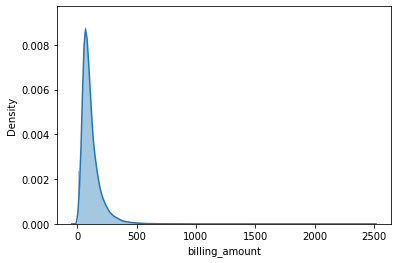

In [30]:
## Checking underlying distributions of numerical variables##
sns.distplot(df["billing_amount"],bins = "auto")

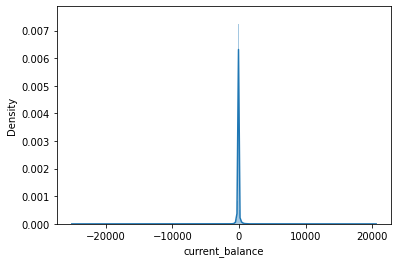

In [31]:
sns.distplot(df["current_balance"],bins = "auto")

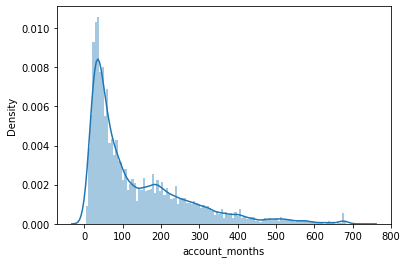

In [32]:
sns.distplot(df["account_months"],bins = "auto")

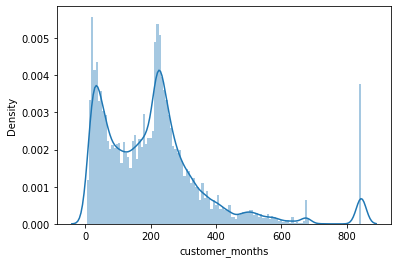

In [33]:
sns.distplot(df["customer_months"],bins = "auto")

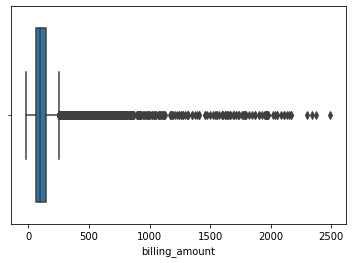

In [35]:
### box plots to check if there are any outliers in numerical variables ###
sns.boxplot(x=df['billing_amount'])

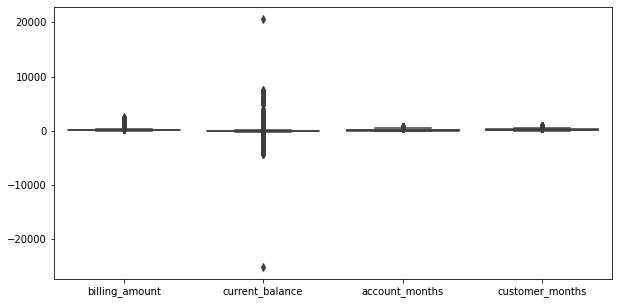

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df_summary)

# **Bivariate Analysis**

In [44]:
# latest_df is a subset of the original data, with only the information for each unique account_id at their last due date
latest_df = df.sort_values('due_dt').groupby('account_id').tail(1).set_index('account_id')
print(latest_df.shape)
latest_df.head()

(9933, 21)


,bill_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,account_months,customer_months,premise_type_code,tender_type_filled,tender_type_descr1,dwelling_type_filled
account_id,,,,,,,,,,,,,,,,,,,,,
127,2054,533.40,-522.62,29-01-2019 19:37,01-02-2019 00:00,NaN,NaN,True,1,NaN,False,False,O,False,True,248,248,ARL,CHCK,check,MultiFamily
7463,119050,58.99,-39.37,01-05-2020 22:08,01-05-2020 00:00,CHCK,Check,True,0,SingleFamily,False,False,O,True,True,5,5,HOU,CHCK,Check,SingleFamily
2875,45935,217.59,-229.12,18-04-2020 12:17,01-05-2020 00:00,NaN,NaN,True,1,MultiFamily,False,False,O,False,True,6,230,APT,CHCK,check,MultiFamily
5376,85947,82.61,-81.57,22-04-2020 19:27,01-05-2020 00:00,CHCK,Check,True,0,SingleFamily,False,False,R,False,True,4,5,HOU,CHCK,Check,SingleFamily
5489,87662,77.59,-34.09,04-05-2020 19:46,01-05-2020 00:00,CHCK,Check,True,1,MultiFamily,False,False,R,False,True,6,6,APT,CHCK,Check,MultiFamily


   has_email  count      prop
0       True   7657  0.770865
1      False   2276  0.229135


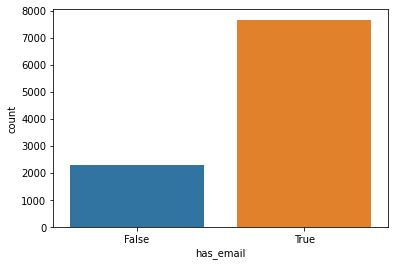

In [45]:
### Frequency Distribution of categorical Variables ###
freq = latest_df['has_email'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(latest_df['has_email'])

• 23% of Account holders have not registered their email id with company and any information sharing through email gets impeded. • Business action plan is to enable this proportion of account hol der to register their email id with company.

   bill_mailed  count      prop
0            1   5107  0.514145
1            0   4826  0.485855


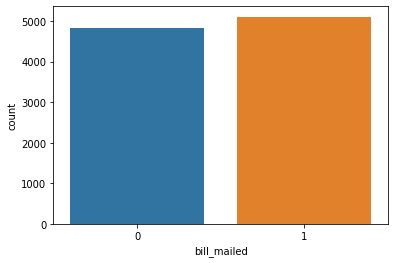

In [46]:
freq = latest_df['bill_mailed'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(latest_df['bill_mailed'])

Only 51% of account holders have recieved the bill through snail mail and 49% account holders didn't recieve the bill. Any other sources of recieving bills is not captured in terms of variables in the data.

This implies that bills were not sent to account holders or maybe they recieved the bill after due date or bills were lost during transit. The above issues maybe the reasons behind late payments due to lack of awarnesses regarding bill due dates and also resulting in variation in bill payment history.

Business actions are required which enables account holders recieve bills through better postal service before due date and also share bill via their registered email id.

   is_equal_pay_acct  count      prop
0              False   9101  0.916239
1               True    832  0.083761


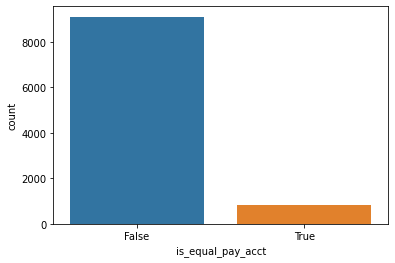

In [47]:
freq = latest_df['is_equal_pay_acct'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(latest_df['is_equal_pay_acct'])

Business action plan recommended which enables all the account holders to enroll for company's equal pay programs.

   is_renewable  count      prop
0         False   7041  0.708849
1          True   2892  0.291151


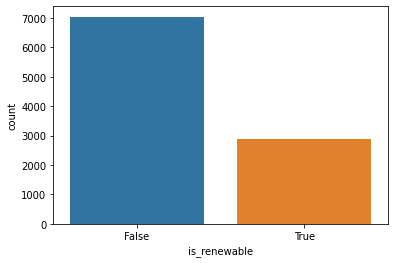

In [48]:
freq = latest_df['is_renewable'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(latest_df['is_renewable'])

Business action plan recommended which enables all the account holders to enroll for company's renewable power programs if there are any mutual benefits associated with these programs.

   is_web_registered  count      prop
0               True   7267  0.731602
1              False   2666  0.268398


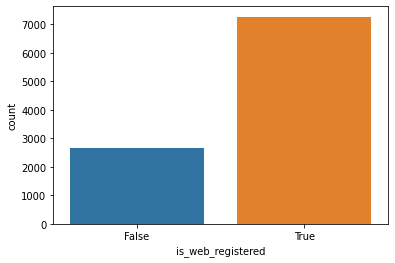

In [49]:
freq = latest_df['is_web_registered'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(latest_df['is_web_registered'])

Business action plan is recommended which ensure all the account holders to register at company's website.

   has_med_cert  count      prop
0         False   9893  0.995973
1          True     40  0.004027


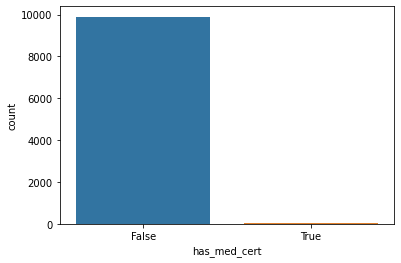

In [51]:
freq = latest_df['has_med_cert'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(latest_df['has_med_cert'])

Looks like 'has_med_cert' is nearly always FALSE

# **Multivariate Analysis**

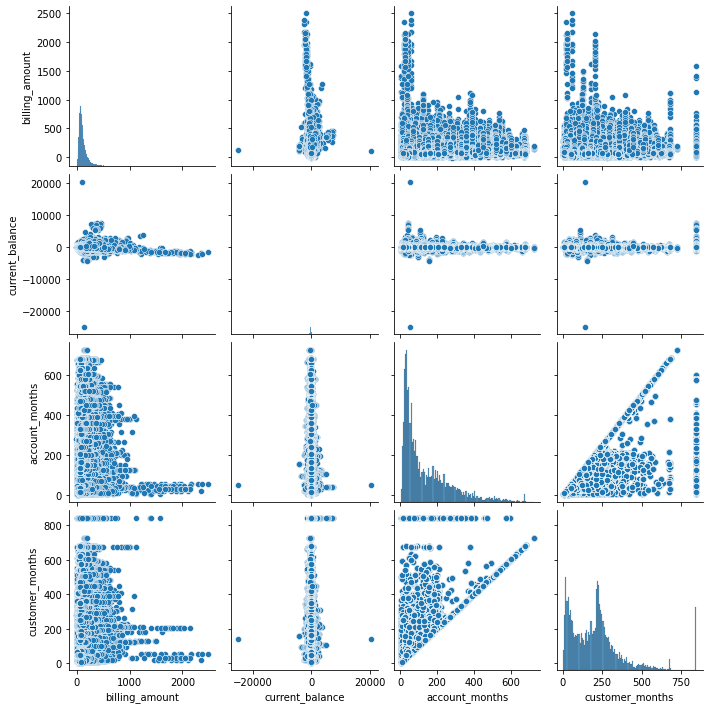

In [52]:
### checking correlations among numerical variables ##
sns.pairplot(df_summary)

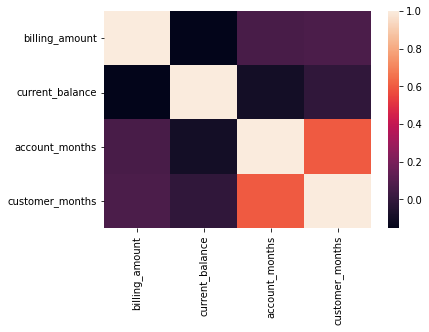

In [53]:
sns.heatmap(df_summary.corr())

# **Statistical Analysis**

In [ ]:
### checking the min and max date due_date column ##
print(df['due_dt'].min())
print(df['due_dt'].max())

01-02-2019 00:00
31-12-2019 00:00


In [ ]:
### checking the no of unique account level id's ###
unique_ac_id = len(df['account_id'].unique().tolist())
unique_ac_id

9933

In [ ]:
#  average/median billing amount
bill_amt_avg = df.groupby('account_id')[['billing_amount']].mean()
bill_amt_median = df.groupby('account_id')[['billing_amount']].median()
print(bill_amt_avg)
print(bill_amt_median)

            billing_amount
account_id                
0                88.692353
1               136.316667
2               171.997647
3                98.247500
4               276.344000
...                    ...
9928             68.984706
9929             42.060000
9930            187.181667
9931             59.368000
9932            301.948667

[9933 rows x 1 columns]
            billing_amount
account_id                
0                   86.020
1                  127.570
2                  170.080
3                   97.665
4                  263.950
...                    ...
9928                67.800
9929                35.210
9930               178.250
9931                56.515
9932               321.640

[9933 rows x 1 columns]


In [ ]:
# types of residences  

# find out different types of residences
df['premise_type_code'].unique()
# there are 8 types of residences. 

array(['HOU     ', 'APT     ', 'MOBH    ', 'ARL     ', 'HSBT    ',
       'CNTW    ', 'COMS    ', 'HOSP    '], dtype=object)

In [ ]:
premise_types = df[['account_id','premise_type_code']].drop_duplicates().set_index('account_id')
np.unique(premise_types['premise_type_code'], return_counts=True)

(array(['APT     ', 'ARL     ', 'CNTW    ', 'COMS    ', 'HOSP    ',
        'HOU     ', 'HSBT    ', 'MOBH    '], dtype=object),
 array([3135,    1,    8,    3,    1, 6314,   12,  459]))

# **Conclusions**



*   	23% of Account holders have not registered their email id with company and any information sharing through email gets
 impeded. Business action plan is to enable this proportion of account 
holder to register their email id with company.

*   Business actions are required which enables account holders recieve bills 
through better postal service before due date and also share bill via their registered email id.


*  	Business action plan recommended which enables all the
 account holders to enroll for company's equal pay  and renewable power programs if there are any mutual benefits associated with these programs.
item 
*  Business action plan is recommended which ensure all the
 account holders to register at company's website.










